In [19]:
#import torch
#torch.cuda.is_available()

True

In [11]:
from fastai import *
from fastai.metrics import error_rate, accuracy
from fastai.data.all import *
from fastai.vision.all import *

In [28]:
#dls = ImageDataLoaders.from_folder("./TartuNet2", valid_pct=0.2, bs=64)

In [10]:
Data = DataBlock( blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, 
splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y=parent_label)
dls = Data.dataloaders("./TartuNet2/train", bs=64)

In [29]:
#dls.valid_ds.items[:10]

[Path('TartuNet2/train/suvi/1986c6171c93b8514d380b3906fd129f4889bf4c.jpg'),
 Path('TartuNet2/train/suvi/50accf2e98e44a4215eb8cf346e183f78af53cfa.jpg'),
 Path('TartuNet2/train/laulupidu/8500bffb698f07c4d56b3c987c8198a70a2c5d9e.jpg'),
 Path('TartuNet2/train/laulupidu/8fbab3f8b8ce626d88c66e7086f20b30da3ecc4e.jpg'),
 Path('TartuNet2/train/linnaruum/574a3e699c2fe22abf1c6dda0c7ede8f4758c54e.jpg'),
 Path('TartuNet2/train/kirik/3b21f1086437d263374337c1c46516a3be8ff03e.jpg'),
 Path('TartuNet2/train/laulupidu/f7893b831e98d20b0d837c44c711c4540a92bbf4.jpg'),
 Path('TartuNet2/train/sügis/944297fd64ae82b3c9c1dcbb3c5d9cb6e5ab9c44.jpg'),
 Path('TartuNet2/train/ehitus/af568c2acea07eefa952464f7870cfa736e56589.jpg'),
 Path('TartuNet2/train/sügis/bcb38fdcfc27ec9615247a71fd1e4fe764965489.jpg')]

In [30]:
#dls.valid_ds[:3]

[(PILImage mode=RGB size=387x469, TensorCategory(31)),
 (PILImage mode=RGB size=387x469, TensorCategory(31)),
 (PILImage mode=RGB size=387x469, TensorCategory(19))]

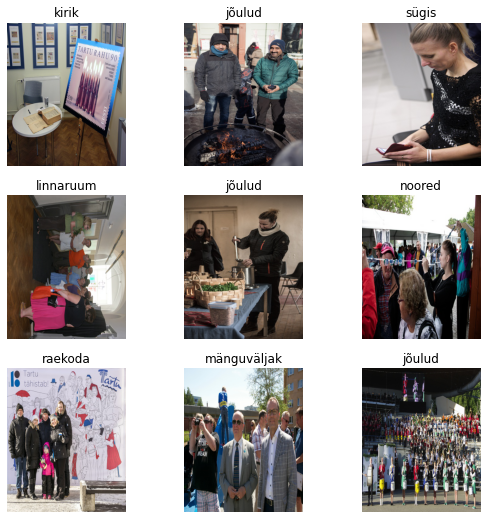

In [35]:
dls.show_batch(max_n=9)

In [12]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate])

In [39]:
learn.fit_one_cycle(3)

In [40]:
learn.save("fastai_res50")

Path('models/fastai_res50.pth')

SuggestedLRs(lr_min=9.120108734350651e-06, lr_steep=6.309573450380412e-07)

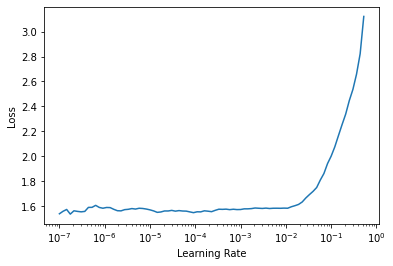

In [41]:
learn.lr_find()

In [42]:
learn.show_results()

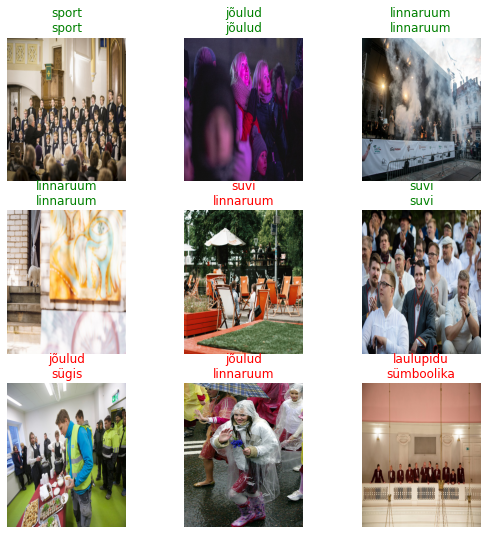

In [43]:
learn.show_results()

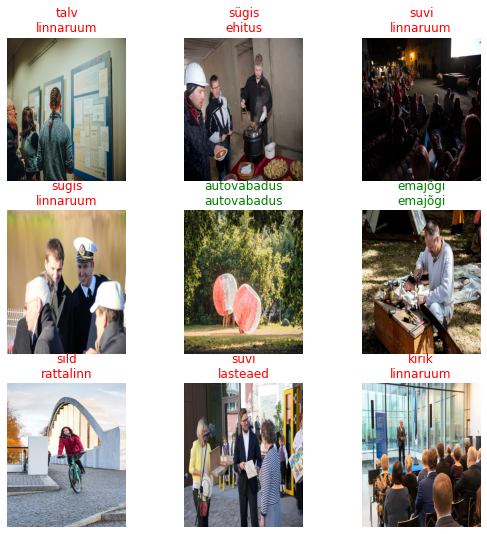

In [44]:
learn.show_results()

In [45]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [46]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
learn = learn.load("fastai_res50")

In [17]:
lbls = dls.vocab
lbls

['aastavahetus', 'annelinn', 'autovabadus', 'bussid', 'eakad', 'ehitus', 'emajõgi', 'istutamine', 'jõulud', 'kaarsild', 'keskkond', 'kevad', 'kirik', 'kliinikum', 'kodu', 'koer', 'kool', 'kunst', 'lasteaed', 'laulupidu', 'linnaruum', 'maskid', 'mänguväljak', 'noored', 'raekoda', 'rattalinn', 'raudtee', 'sild', 'sotsiaalmeedia', 'sport', 'supilinn', 'suvi', 'sügis', 'sümboolika', 'talv', 'tantsupidu', 'toit', 'ülikool']

In [14]:
clset = pd.read_csv("classificationset.csv", sep=";", index_col=0)
clset

name                labels  \
0      128f3804ef661cb9511ec2a1cffb8f90b629e305.jpg      sügis, linnaruum   
1      6b2c6dc7f00d3d1dc7d05b83bc4ac3e87508eace.jpg  kodu, sotsiaalmeedia   
2      1660d07bd50fb69d74d9bb302e12b34497846110.jpg             linnaruum   
3      a1c20505e11a56cedd940b5bc7386e429e00b2a4.jpg      kevad, linnaruum   
4      5825c870e64d0ff8f11eb14bb97932b50091f1b4.jpg             linnaruum   
...                                             ...                   ...   
43596  83ed174e805e0b6aabe4c4d3c32e44c09b896115.jpg        sotsiaalmeedia   
43597  89dd7fab91a605d853cfda8cbb13a742bca8f760.jpg        sotsiaalmeedia   
43598  6dc097b77c703edd50b1b52e660a8572c6a48d19.jpg        sotsiaalmeedia   
43599  df2154a0da37ee8d994cac691637824829d880c0.jpg        sotsiaalmeedia   
43600  0f697a28f7fab5c1698483cd1504a7c2c82b0d2d.jpg        sotsiaalmeedia   

                                                                              path  
0               TartuNet2/train/sügis/128f3804ef661cb9511ec2a1cffb8f90b629e305.jpg  
1                TartuNet2/train/kodu/6b2c6dc7f00d3d1dc7d05b83bc4ac3e87508eace.jpg  
2           TartuNet2/train/linnaruum/1660d07bd50fb69d74d9bb302e12b34497846110.jpg  
3               TartuNet2/train/kevad/a1c20505e11a56cedd940b5bc7386e429e00b2a4.jpg  
4           TartuNet2/train/linnaruum/5825c870e64d0ff8f11eb14bb97932b50091f1b4.jpg  
...                                                                            ...  
43596  TartuNet2/train/sotsiaalmeedia/83ed174e805e0b6aabe4c4d3c32e44c09b896115.jpg  
43597  TartuNet2/train/sotsiaalmeedia/89dd7fab91a605d853cfda8cbb13a742bca8f760.jpg  
43598  TartuNet2/train/sotsiaalmeedia/6dc097b77c703edd50b1b52e660a8572c6a48d19.jpg  
43599  TartuNet2/train/sotsiaalmeedia/df2154a0da37ee8d994cac691637824829d880c0.jpg  
43600  TartuNet2/train/sotsiaalmeedia/0f697a28f7fab5c1698483cd1504a7c2c82b0d2d.jpg  

[43601 rows x 3 columns]

In [19]:
res50pred = pd.DataFrame(columns = ["name","y","pred_name", "pred_idx", "pred_3first"])
res50pred

Empty DataFrame
Columns: [name, y, pred_name, pred_idx, pred_3first]
Index: []

In [ ]:

for i in range(len(clset)):
    pred = learn.predict(clset.iloc[i]["path"])
    prs = np.array(pred[2])
    p = lbls[np.argsort(prs)[::-1][:3]]
    res50pred = res50pred.append({"name":clset.iloc[i]["name"], "y": clset.iloc[i]["labels"], "pred_name": pred[0], "pred_idx": pred[1].item(),"pred_3first": ", ".join(p)}, ignore_index=True)

res50pred.to_csv("res50pred.csv", sep=";")

In [3]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate])

In [4]:
learn.fit_one_cycle(5)

In [5]:
learn.save("fastai_res50_5")

Path('models/fastai_res50_5.pth')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.4454397387453355e-05)

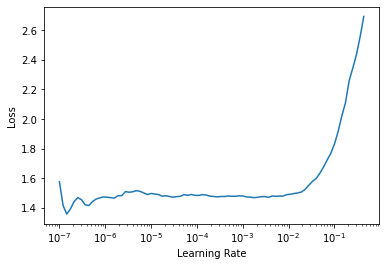

In [6]:
learn.lr_find()

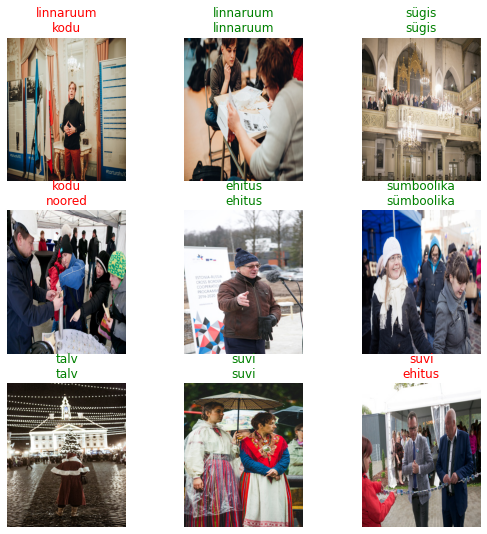

In [7]:
learn.show_results()

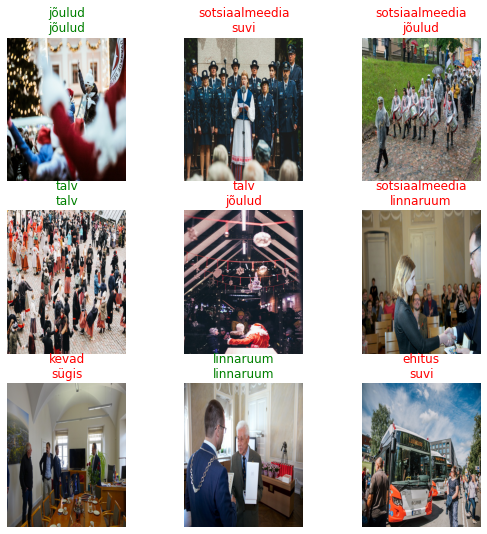

In [8]:
learn.show_results()

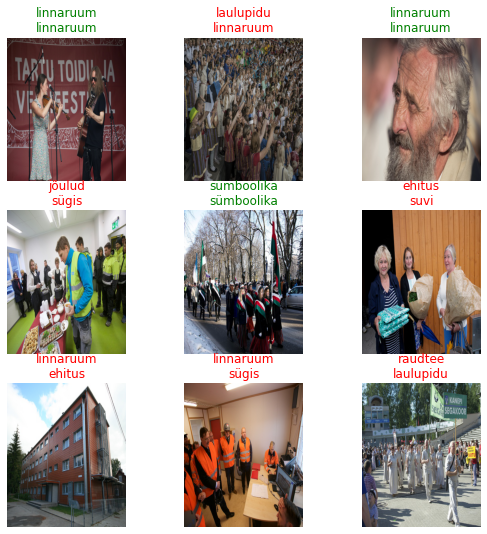

In [9]:
learn.show_results()